In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
x = tf.range(0,100,2)

In [4]:
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98],
      dtype=int32)>

In [5]:
y = 2*x+6
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([  6,  10,  14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,
        58,  62,  66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106,
       110, 114, 118, 122, 126, 130, 134, 138, 142, 146, 150, 154, 158,
       162, 166, 170, 174, 178, 182, 186, 190, 194, 198, 202], dtype=int32)>

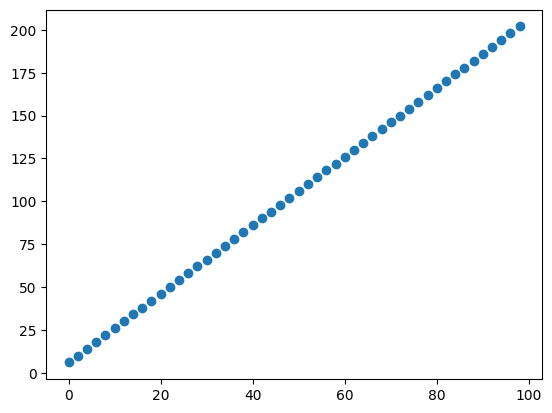

In [6]:
plt.scatter(x,y)
plt.show()

**Model Building**

In [7]:
#create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,input_shape = (1,)),
    tf.keras.layers.Dense(1)
])

#complie the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ['mae'])

#train the model
model.fit(x,y,epochs  = 10)

Epoch 1/10
2/2 [==============================] - 2s 71ms/step - loss: 94.4607 - mae: 94.4607
Epoch 2/10
2/2 [==============================] - 0s 10ms/step - loss: 92.6708 - mae: 92.6708
Epoch 3/10
2/2 [==============================] - 0s 15ms/step - loss: 90.8672 - mae: 90.8672
Epoch 4/10
2/2 [==============================] - 0s 16ms/step - loss: 89.0767 - mae: 89.0767
Epoch 5/10
2/2 [==============================] - 0s 15ms/step - loss: 87.1942 - mae: 87.1942
Epoch 6/10
2/2 [==============================] - 0s 14ms/step - loss: 85.4534 - mae: 85.4534
Epoch 7/10
2/2 [==============================] - 0s 16ms/step - loss: 83.6507 - mae: 83.6507
Epoch 8/10
2/2 [==============================] - 0s 16ms/step - loss: 81.8042 - mae: 81.8042
Epoch 9/10
2/2 [==============================] - 0s 20ms/step - loss: 80.0756 - mae: 80.0756
Epoch 10/10
2/2 [==============================] - 0s 22ms/step - loss: 78.1859 - mae: 78.1859


In [8]:
model.predict([150,-10])

1/1 [==============================] - 0s 432ms/step


array([[83.220894 ],
       [-5.3476295]], dtype=float32)

**Save model**

In [9]:
#save model using save
model.save('model_1')

In [10]:
#save model using HDFS format
model.save('model_2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Load model**

In [13]:
newmodel_1 = tf.keras.models.load_model('model_1')

In [14]:
newmodel_1.predict([150,-10])

1/1 [==============================] - 0s 109ms/step


array([[83.220894 ],
       [-5.3476295]], dtype=float32)

In [15]:
newmodel_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
